# Table of Contents

0. [Import libraries and dataset](#0.-Import-libraries-and-dataset)

      - [Install libraries](#Install-libraries)
      - [Import libraries](#Import-libraries)
      - [Import dataset](#Import-dataset)
1. [Data analysis](#1.-Data-analysis) 

   1.1 [Geospatial analysis](#1.1-Geospatial-analysis)
   
      - [Plotting a choropleth map for total CO2 emission](#Plotting-a-choropleth-map-for-total-CO2-emission)
      - [Plotting a choropleth map for per capita CO2 emission](#Plotting-a-choropleth-map-for-per-capita-CO2-emission)

   1.2 [Time-series analysis](#1.2-Time-series-analysis)
      
      1.2.1 [Time-series: Total emission](#1.2.1-Time-series:-Total-emission)  
         
      - [Total CO2 emission trend analysis](#Total-CO2-emission-trend-analysis)
      - [Forecasting total CO2 emission](#Forecasting-total-CO2-emission)
        - [Decomposition: total CO2](#Decomposition:-total-CO2)
        - [Testing for stationarity: total CO2](#Testing-for-stationarity:-total-CO2)
        - [Stationarizing the total CO2 emission data](#Stationarizing-the-total-CO2-emission-data)
            
        
      1.2.2 [Time-series: Per capita emission](#1.2.2-Time-series:-Per-capita-emission)
        
      - [Per capita CO2 emission trend analysis](#Per-capita-CO2-emission-trend-analysis)
      - [Forecasting per capita CO2 emission](#Forecasting-per-capita-CO2-emission)
         - [Decomposition: per capita CO2](#Decomposition:-per-capita-CO2)
         - [Testing for stationarity: per capita CO2](#Testing-for-stationarity:-per-capita-CO2)
         - [Stationarizing the total CO2 emission data](#Stationarizing-the-total-CO2-emission-data)
        
      




# 0. Import libraries and dataset

### Install libraries 

In [1]:
conda install quandl  # we need quandl library. If not installed before, install quandl using conda.



Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Lemlem



In [2]:
# install scikit-learn using pip (python -m pip install scikit-learn) because scikit-learn is best installed using pip instead of conda

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import os

# For statistical graphics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# For geospatial analysis 
import folium
import json

# For time-series analysis
import quandl
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. 
plt.style.use('fivethirtyeight') # This is a styling option for how  plots will appear.

# For supervised machine learning: regression analysis
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Import dataset

In [4]:
# Creating a path string 
path = r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis"

In [5]:
# Importing the dataset as "agri_food_emission"

agri_food_co2_emission = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared data', 'agri_food_co2_emission_clean.pkl'))

In [6]:
# Checking the dataset is correctly imported

agri_food_co2_emission.head()


,Area,Year,Rural population,Urban population,Average Temperature °C,Total emission,Total population,Per capita emission
3,Afghanistan,1993,11858090.0,3237009.0,0.101917,1322.430529,14003760.0,0.000094
4,Afghanistan,1994,12690115.0,3482604.0,0.372250,1441.128529,15455554.0,0.000093
5,Afghanistan,1995,13401971.0,3697570.0,0.285583,1533.646929,16418912.0,0.000093
6,Afghanistan,1996,13952791.0,3870093.0,0.036583,1649.126329,17106596.0,0.000096
7,Afghanistan,1997,14373573.0,4008032.0,0.415167,1912.892415,17788820.0,0.000108


In [7]:
# Checking the number of rows and columns in the dataset

agri_food_co2_emission.shape

(5089, 8)

# 1. Data analysis

 ## 1.1 Geospatial analysis 

 ### Plotting a choropleth map for total CO2 emission

In [8]:
# Make matplotlib visuals to appear in the notebook 

%matplotlib inline

In [9]:
# Import "json" file for the world

world_geo= r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\02_Data\Original data\world-countries.json"




In [10]:
# Check the JSON file contents  :

f = open(r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\02_Data\Original data\world-countries.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [11]:
# Group by 'Area' and calculate average value of 'Total emission' from the time series data

avg_emission = agri_food_co2_emission.groupby('Area')['Total emission'].mean().reset_index()

# Sort avg_emission in descending order to get top 5 regions
top_5 = avg_emission.sort_values(by='Total emission', ascending=False).head(5)

# Sort avg_emission in ascending order to get bottom 5 regions
bottom_5 = avg_emission.sort_values(by='Total emission', ascending=True).head(5)

In [12]:
top_5

,Area,Total emission
19,Brazil,1.069224e+06
80,Indonesia,8.593132e+05
32,China,7.865931e+05
36,"China, mainland",7.476405e+05
46,Democratic Republic of the Congo,5.429098e+05


In [13]:
bottom_5

,Area,Total emission
140,Russian Federation,-385699.425464
139,Romania,-39668.209250
31,Chile,-26167.104421
21,Bulgaria,-17924.765018
124,Norway,-9685.803619


In [14]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)


# Create a choropleth map
folium.Choropleth(
    geo_data = world_geo, 
    data = avg_emission,
    columns = ['Area', 'Total emission'],
    key_on = 'feature.properties.name', #  check  json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.3,
    legend_name = "Total Agri-Food CO2 Emission (kt)").add_to(map)
folium.LayerControl().add_to(map)



# Create HTML for the sidebar listing top  5 areas
sidebar_htmlT = '''
    </ul>
    <h4 style="white-space: nowrap;">Top 5 Emitting Areas</h4>
    <ul>
       
    <li>Brazil</li>
    <li>Indonesia</li>
    <li>China</li>
    <li>China, mainland</li>
    <li>Democratic Republic of the Congo</li>
    </ul>
'''
# Add sidebar as a Marker to the map
folium.Marker(
    [85, 170],  
    icon=folium.DivIcon(html=sidebar_htmlT),
    tooltip='Top 5 Areas'
   ).add_to(map)



#  Create HTML for the sidebar listing bottom  5 areas
sidebar_htmlB = '''
    </ul>
    <h4 style="white-space: nowrap;">Bottom 5 Emitting Areas</h4>
    <ul>
        
    <li>Russian Federation</li>
    <li>Romania</li>
    <li>Chile</li>
    <li>Bulgaria</li>
    <li>Norway</li>
    </ul>
'''
# Add sidebar as a Marker to the map
folium.Marker(
    [50, 170],  
    icon=folium.DivIcon(html=sidebar_htmlB),
    tooltip='Bottom 5 Areas'
  ).add_to(map)


map



   
    Countries with dark grey color are countries either without a dataset (either there was no data set for those countries in the original dataset or the dataset for these countries is excluded through data consistency check) or it could also be due to inconsistency in country naming in the data frame and in the json file. While checking the map I found that there are some countries which are inconsistently named in the data frame and json file. In the following steps i correct those inconsistencies. 
    



In [15]:
# Identify 'Area' name inconsistency between json file and Dataframe

# Extract country names from JSON
valid_countries = {feature['properties']['name'] for feature in data['features']}

# Convert DataFrame 'Country' column to a set
df_countries = set(agri_food_co2_emission['Area'])

# Find inconsistent country names
inconsistent_countries = df_countries - valid_countries

# Print inconsistent country names
print("Inconsistent country names:", inconsistent_countries)

Inconsistent country names: {'Bolivia (Plurinational State of)', 'Palestine', 'Czechia', 'Guadeloupe', 'Comoros', 'Bahrain', 'China, mainland', 'Cabo Verde', 'Netherlands (Kingdom of the)', 'Dominica', 'China, Taiwan Province of', 'China, Hong Kong SAR', 'Malta', 'Syrian Arab Republic', 'Republic of Korea', 'Eswatini', 'Saint Lucia', 'Grenada', 'Channel Islands', 'Brunei Darussalam', 'Samoa', 'North Macedonia', 'Barbados', 'Viet Nam', 'Republic of Moldova', 'French Polynesia', 'Sao Tome and Principe', 'Seychelles', 'Congo', 'Saint Vincent and the Grenadines', 'Timor-Leste', 'Russian Federation', "Democratic People's Republic of Korea", 'Singapore', 'United Kingdom of Great Britain and Northern Ireland', 'China, Macao SAR', "Lao People's Democratic Republic", 'Venezuela (Bolivarian Republic of)', 'Guinea-Bissau', 'Tonga', 'Iran (Islamic Republic of)', 'Bahamas', 'Maldives', 'Martinique', 'Mauritius'}


In [16]:
# Extract country names from JSON 

country_names = {feature['properties']['name'] for feature in data['features']}

# Print the list of countries
print("Countries in the JSON file:")
for country in sorted(country_names):
    print(country)

Countries in the JSON file:
Afghanistan
Albania
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Czech Republic
Democratic Republic of the Congo
Denmark
Djibouti
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands
Fiji
Finland
France
French Southern and Antarctic Lands
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Guatemala
Guinea
Guinea Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mo

In [17]:
# Create a mapping dictionary (used the country names extracted from the json file as a reference for the mapping)

name_mapping = {
    'Congo': 'Democratic Republic of the Congo',
    'China, Taiwan Province of': 'Taiwan',
    'Brunei Darussalam': 'Brunei',
    'Republic of Moldova': 'Moldova',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Eswatini': 'Swaziland',
    'Czechia': 'Czech Republic',
    'Viet Nam': 'Vietnam',
    'China, Hong Kong SAR': 'Hong Kong',
    'Guinea-Bissau': 'Guinea Bissau',
    'Iran (Islamic Republic of)': 'Iran',
    'North Macedonia': 'Macedonia',
    "Democratic People's Republic of Korea": 'North Korea',
    "Lao People's Democratic Republic": 'Laos',
    'Netherlands (Kingdom of the)': 'Netherlands',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Syrian Arab Republic': 'Syria',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'China, mainland': 'China',
    'Republic of Korea': 'South Korea'
    }

In [18]:
# Apply the name mapping

agri_food_co2_emission['Area'] = agri_food_co2_emission['Area'].map(name_mapping).fillna(agri_food_co2_emission['Area'])



In [19]:
# Verify if all countries in the DataFrame are now valid

invalid_countries = set(agri_food_co2_emission['Area']) - valid_countries
print("Invalid countries after mapping:", invalid_countries)


Invalid countries after mapping: {'Palestine', 'Guadeloupe', 'Comoros', 'Bahrain', 'Cabo Verde', 'Dominica', 'Malta', 'Hong Kong', 'Grenada', 'Saint Lucia', 'Channel Islands', 'Samoa', 'Barbados', 'French Polynesia', 'Sao Tome and Principe', 'Seychelles', 'Saint Vincent and the Grenadines', 'Timor-Leste', 'Singapore', 'China, Macao SAR', 'Tonga', 'Bahamas', 'Maldives', 'Martinique', 'Mauritius'}


    It was not possible to get a matching country names in the JSON file for these countries. 

In [20]:
# Recalculate and map. Group by 'Area' and calculate average value of 'Total emission' from the time series data

avg_emission = agri_food_co2_emission.groupby('Area')['Total emission'].mean().reset_index()

# Sort avg_emission in descending order to get top 5 regions
top_5 = avg_emission.sort_values(by='Total emission', ascending=False).head(5)

# Sort avg_emission in ascending order to get bottom 5 regions
bottom_5 = avg_emission.sort_values(by='Total emission', ascending=True).head(5)

In [21]:
top_5

,Area,Total emission
19,Brazil,1.069224e+06
75,Indonesia,8.593132e+05
32,China,7.671168e+05
74,India,4.528680e+05
41,Democratic Republic of the Congo,2.787614e+05


In [22]:
bottom_5

,Area,Total emission
135,Russia,-385699.425464
134,Romania,-39668.209250
31,Chile,-26167.104421
21,Bulgaria,-17924.765018
121,Norway,-9685.803619


In [23]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)


# Create a choropleth map
folium.Choropleth(
    geo_data = world_geo, 
    data = avg_emission,
    columns = ['Area', 'Total emission'],
    key_on = 'feature.properties.name', #  check  json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.3,
    legend_name = "Total Agri-Food CO2 Emission (kt)").add_to(map)
folium.LayerControl().add_to(map)



# Create HTML for the sidebar listing top  5 areas
sidebar_htmlT = '''
    </ul>
    <h4 style="white-space: nowrap;">Top 5 Emitting Areas</h4>
    <ul>
       
    <li>Brazil</li>
    <li>Indonesia</li>
    <li>China</li>
    <li>China, mainland</li>
    <li>Democratic Republic of the Congo</li>
    </ul>
'''
# Add sidebar as a Marker to the map
folium.Marker(
    [85, 170],  
    icon=folium.DivIcon(html=sidebar_htmlT),
    tooltip='Top 5 Areas'
   ).add_to(map)



#  Create HTML for the sidebar listing bottom  5 areas
sidebar_htmlB = '''
    </ul>
    <h4 style="white-space: nowrap;">Bottom 5 Emitting Areas</h4>
    <ul>
        
    <li>Russia</li>
    <li>Romania</li>
    <li>Chile</li>
    <li>Bulgaria</li>
    <li>Norway</li>
    </ul>
'''
# Add sidebar as a Marker to the map
folium.Marker(
    [50, 170],  
    icon=folium.DivIcon(html=sidebar_htmlB),
    tooltip='Bottom 5 Areas'
  ).add_to(map)


map



    Emission is calculated without considering emission from 'Crop Residues', 'Industrial Processes and Product Use (IPPU)','Manure applied to Soils', 'Manure Management' and 'On-farm energy use'.

In [24]:
# Save the map


map.save(r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\04_Analysis\Visualization\chropleth_total_emission.html')

### Plotting a choropleth map for per capita CO2 emission

In [25]:
# Group by 'Area' and calculate average value of 'Per capita emission' from the time series data

avg_per_capita_emission = agri_food_co2_emission.groupby('Area')['Per capita emission'].mean().reset_index()

# Sort avg_per_capita_emission in descending order to get top 5 regions
top_5_per_capita = avg_per_capita_emission.sort_values(by='Per capita emission', ascending=False).head(5)

# Sort avg_emission in ascending order to get bottom 5 regions
bottom_5_per_capita = avg_per_capita_emission.sort_values(by='Per capita emission', ascending=True).head(5)

In [26]:
top_5_per_capita

,Area,Per capita emission
163,Tonga,0.023185
143,Seychelles,0.021182
68,Guyana,0.020131
20,Brunei,0.019816
139,Samoa,0.019745


In [27]:
bottom_5_per_capita

,Area,Per capita emission
135,Russia,-0.002665
147,Slovenia,-0.002518
21,Bulgaria,-0.002330
121,Norway,-0.002024
134,Romania,-0.002014


In [28]:
# Create a choropleth map

map = folium.Map(location = [100, 0], zoom_start = 1.5) # Setup a folium map at a high-level zoom

# Add a choropleth layer
folium.Choropleth(
    geo_data = world_geo, 
    data = avg_per_capita_emission,
    columns = ['Area', 'Per capita emission'],
    key_on = 'feature.properties.name', #  check  json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.3,
    legend_name = "Per Capita Agri-food CO2 Emission").add_to(map)
folium.LayerControl().add_to(map)  




# Create HTML for the sidebar listing top  5 areas
sidebar_htmlT = '''
    </ul>
    <h4 style="white-space: nowrap;">Highest Per Capita Emission</h4>
    <ul>
      
    <li>Tonga</li>
    <li>Seychelles</li>
    <li>Guyana</li>
    <li>Brunei Darussalam</li>
    <li>Samoa</li>
    </ul>
'''     
# Add sidebar as a Marker to the map
folium.Marker(
    [85, 160],  
    icon=folium.DivIcon(html=sidebar_htmlT),
    tooltip='Top 5 Areas Per Capita Emission'
   ).add_to(map)     



#  Create HTML for the sidebar listing bottom  5 areas
sidebar_htmlB = '''
    </ul>
    <h4 style="white-space: nowrap;">Lowest Per Capita Emission</h4>
    <ul>
    
    
    <li>Russia</li>
    <li>Slovenia</li>
    <li>Bulgaria</li>
    <li>Norway</li>
    <li>Romania</li>
    </ul>
'''
# Add sidebar as a Marker to the map
folium.Marker(
    [50, 160],  
    icon=folium.DivIcon(html=sidebar_htmlB),
    tooltip='Bottom 5 Areas Per Capita Emission'
  ).add_to(map)


map


    Emission is calculated without considering emission from 'Crop Residues','Industrial Processes and Product Use (IPPU)','Manure applied to Soils','Manure Management' and 'On-farm energy use'.

In [29]:
# Save the map
map.save(r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\04_Analysis\Visualization\chropleth_per_capita_emission.html')


## 1.2 Time-series analysis

### 1.2.1 Time-series: Total emission

#### Total CO2 emission trend analysis

In [30]:
# Grouping the data by 'Year' as the main dataset contains data for countries across the world, we need to calculate the average 'Total emission' per year

total_emission_trend=agri_food_co2_emission.groupby('Year').agg({'Total emission':'mean'})

In [31]:
# Check the dataset

total_emission_trend. head(5)

,Total emission
Year,
1993,41482.147347
1994,41865.798369
1995,43281.431802
1996,42399.318952
1997,48192.920158


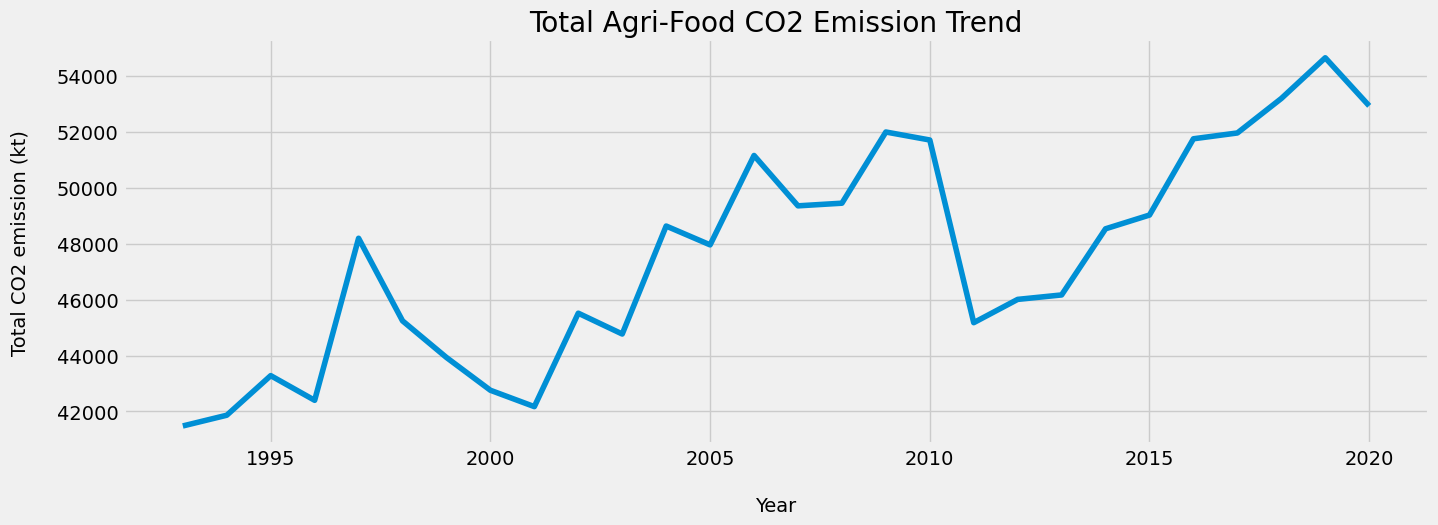

In [32]:
# Plot time-series data of total co2 emission

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, if we have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.ylabel('Total CO2 emission (kt)', labelpad=20, fontsize=14)
plt.xlabel('Year', labelpad=20, fontsize=14)
plt.title('Total Agri-Food CO2 Emission Trend')
plt.plot(total_emission_trend)
plt.savefig(r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\04_Analysis\Visualization\total_emission_trend.png')



#### Forecasting total CO2 emission

##### Decomposition: total CO2

In [33]:
# Decompose the time series using multiplicative model

decomposition = sm.tsa.seasonal_decompose(total_emission_trend, model='multiplicative', period=1)

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

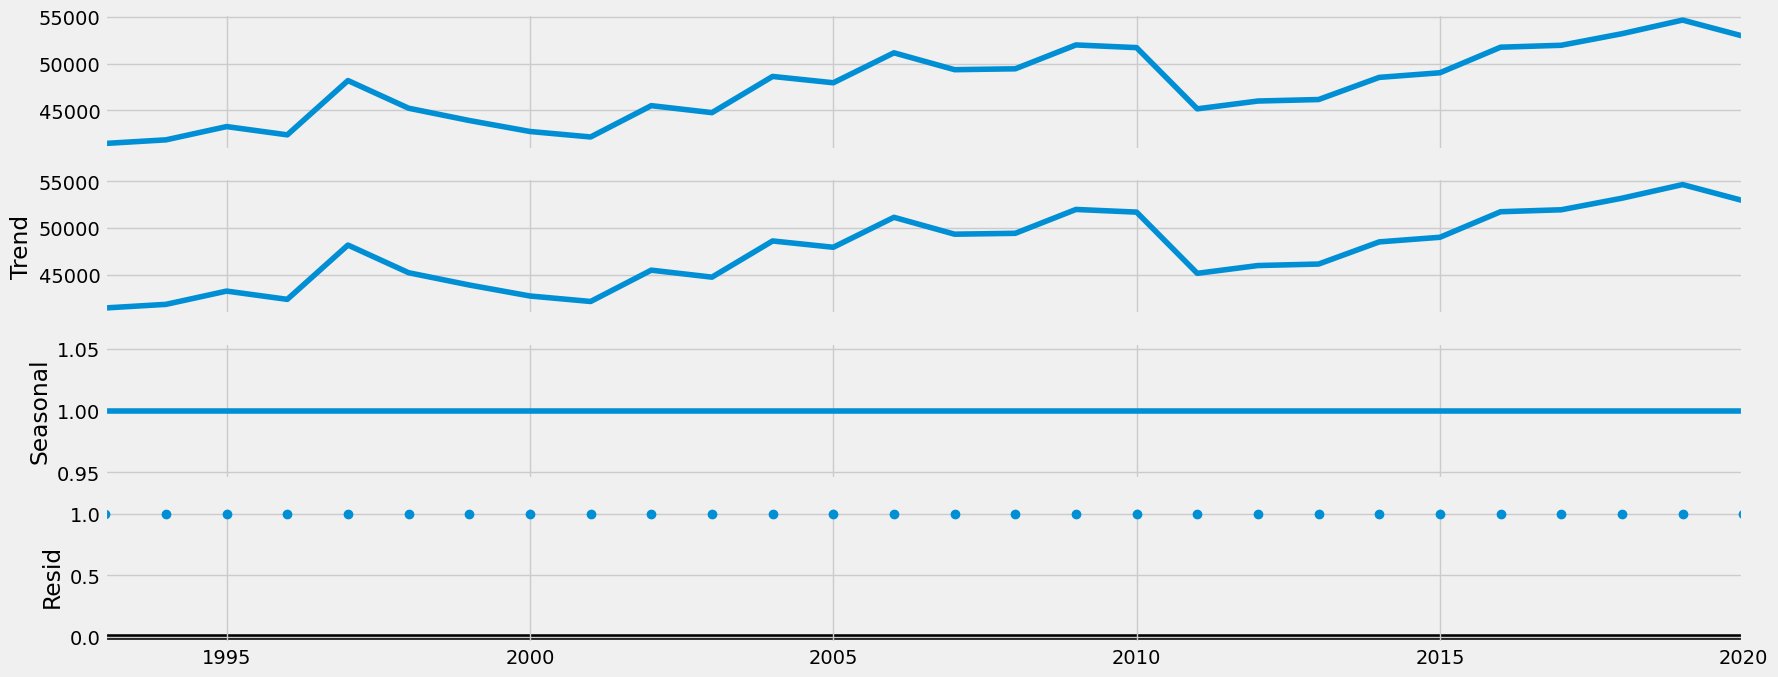

In [35]:
# Plot the separate components

decomposition.plot()
plt.show()

The first and the second chart represent the data itself and the trend respectively. The level (data itself) and trend appear similar. This is because the data was not smoothed ( since it is a yearly data we do not expect a lot of fluctuation therefore no need to smooth the data). The seasonal chart does not show any seasonal fluctuations may be this is beacuse this is an annnual data. The fourth chart refers to the residual. The residual chart suggests that there is not much unexplained noise.

##### Testing for stationarity: total CO2

In [36]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(total_emission_trend['Total emission'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.763119
p-value                         0.398920
Number of Lags Used             0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


    The result of Dickey-Fuller test ( i.e., the test statistics is bigger than the critical value) suggest that data is non-stationary.

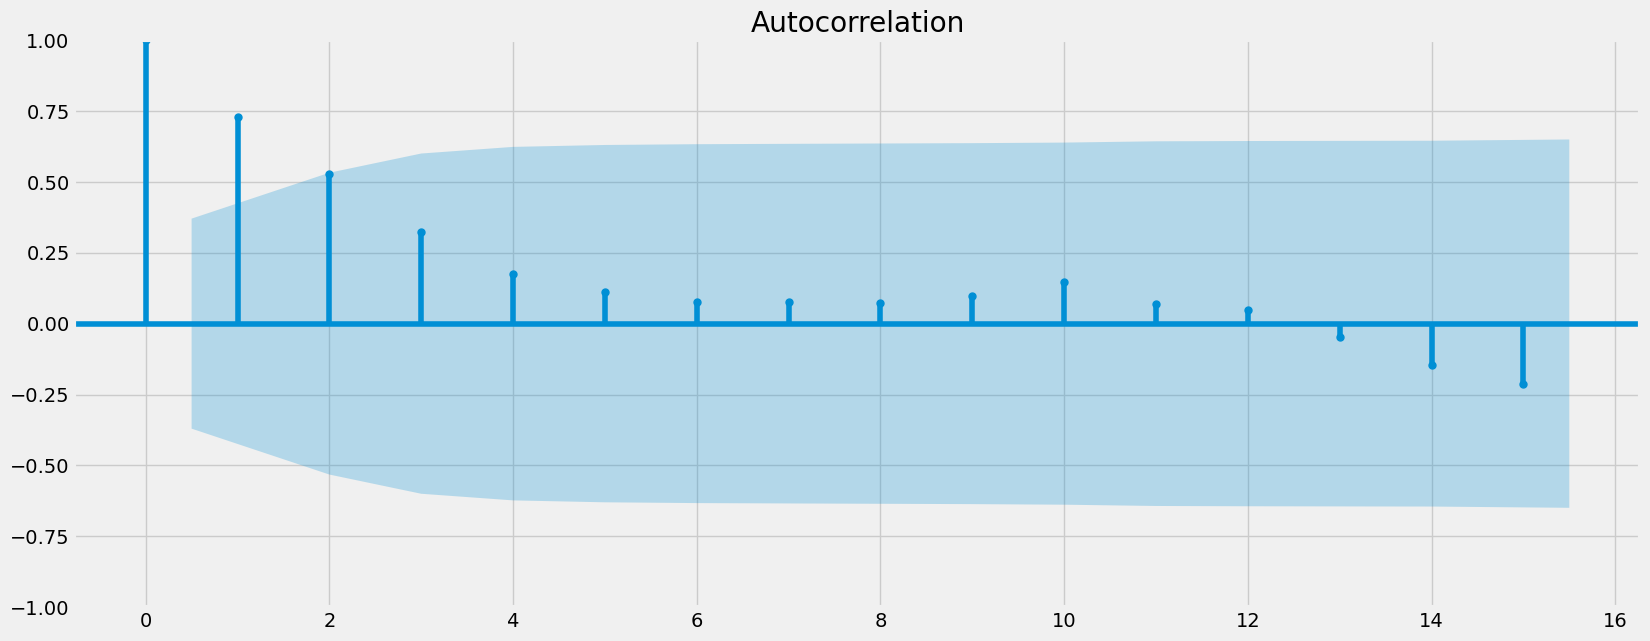

In [37]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the autocorrelation and partial correlation plots

plot_acf(total_emission_trend)
plt.show()

    The autocorrelation plot shows that there are a couple of lags beyond the confidence interval.

##### Stationarizing the total CO2 emission data

In [38]:
data_diff = total_emission_trend - total_emission_trend.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [39]:
data_diff.dropna(inplace = True) # Remove the missing values that came about as a result of the differencing. Otherwise,we won't be able to run the Dickey-Fuller test.

In [40]:
data_diff.head()

,Total emission
Year,
1994,383.651022
1995,1415.633433
1996,-882.112850
1997,5793.601206
1998,-2952.199022


In [41]:
data_diff.columns # Check columns of the new dataset

Index(['Total emission'], dtype='object')

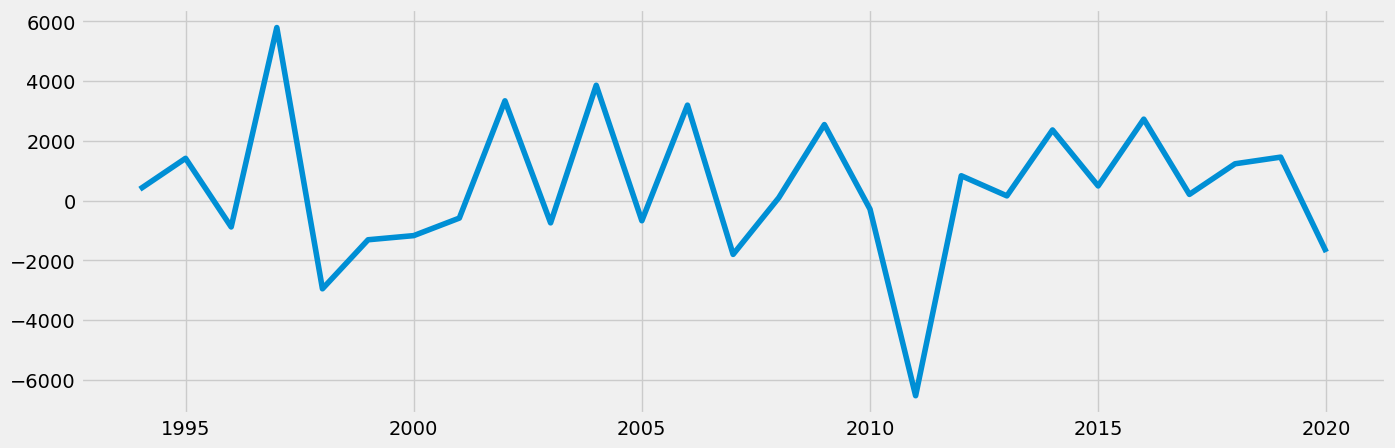

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [43]:
dickey_fuller(data_diff) # Check stationarity in the new dataset

Dickey-Fuller Stationarity test:
Test Statistic                -6.399549e+00
p-value                        2.011347e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


    The result of Dickey-Fuller test suggests that our data is now stationary( the test statistics is lessthan the critical value)

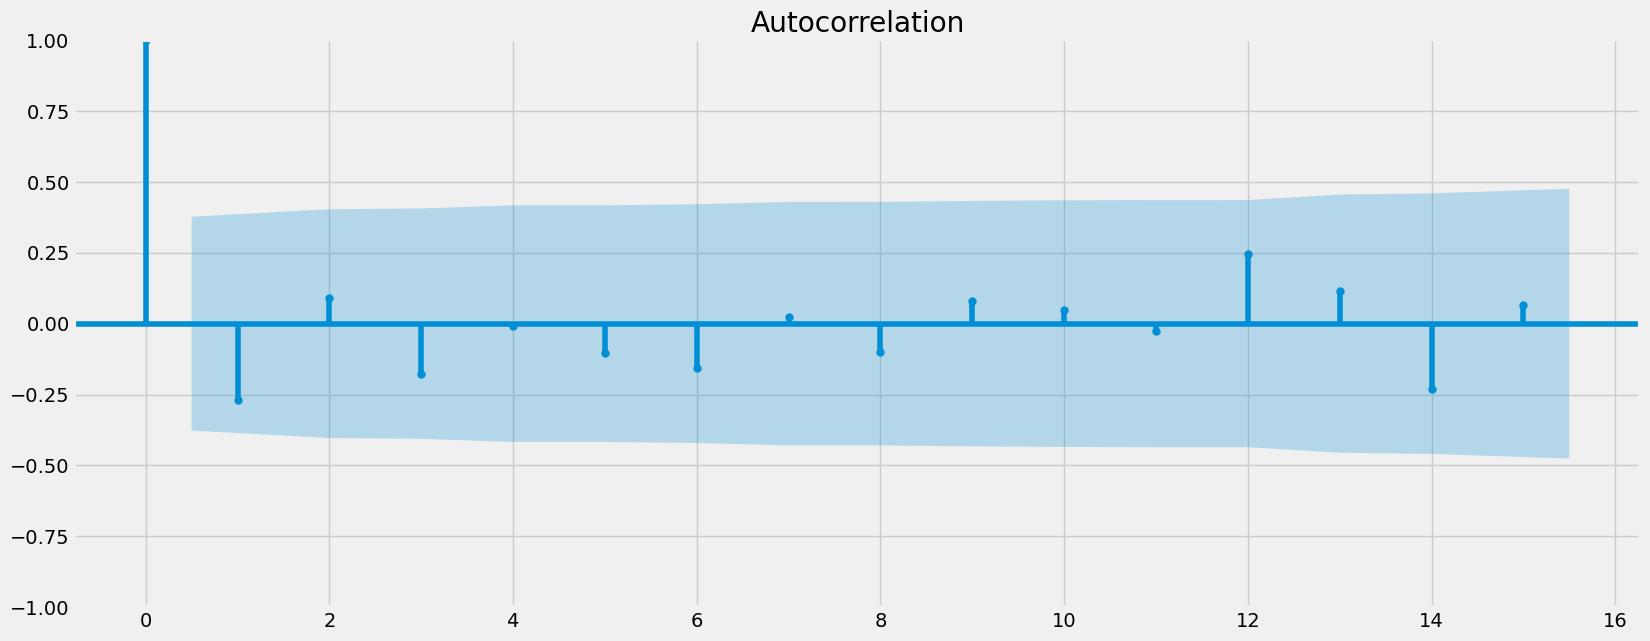

In [44]:
plot_acf(data_diff)
plt.show()

### 1.2.2 Time-series: Per capita emission

#### Per capita CO2 emission trend analysis

In [45]:
# Grouping the data by 'Year' as the main dataset contains data for countries across the world, we need to calculate the average 'Per capita emission' per year

per_capita_emission_trend=agri_food_co2_emission.groupby('Year').agg({'Per capita emission':'mean'})

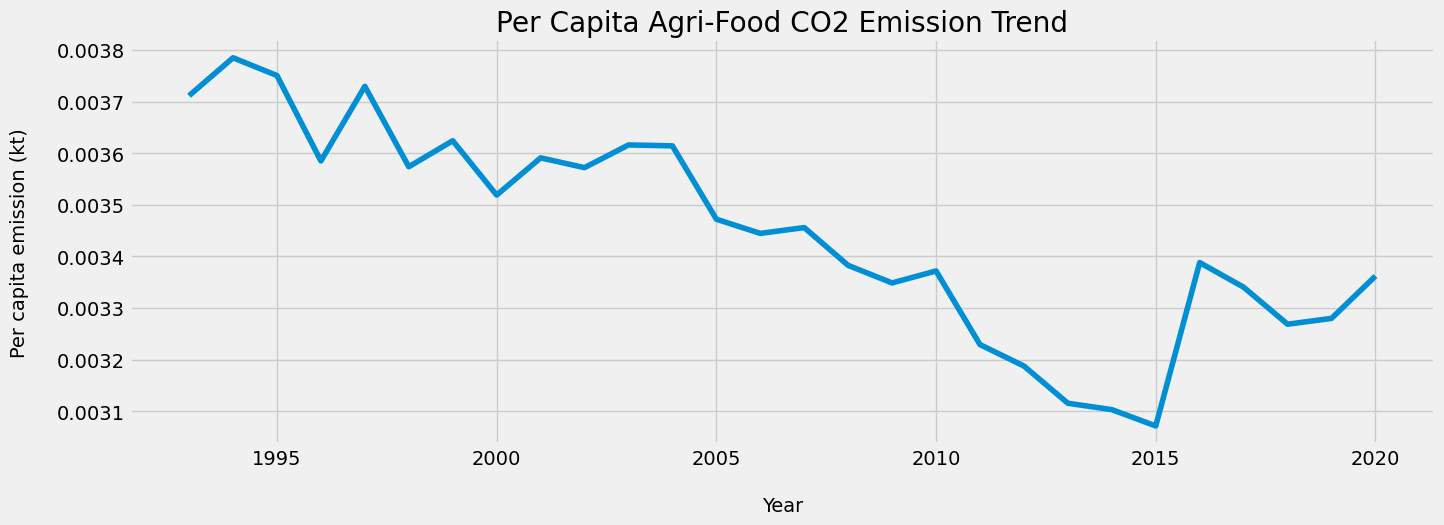

In [46]:
# Plot the trend 

plt.figure(figsize=(15,5), dpi=100) 
plt.ylabel('Per capita emission (kt)', labelpad=20, fontsize=14)
plt.xlabel('Year', labelpad=20, fontsize=14)
plt.title('Per Capita Agri-Food CO2 Emission Trend')
plt.plot(per_capita_emission_trend)
plt.savefig(r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis\04_Analysis\Visualization\per_capita_emission_trend.png')

#### Forecasting per capita CO2 emission

##### Decomposition: per capita CO2

In [47]:
# Decompose the time series using multiplicative model

decomposition_per_capita = sm.tsa.seasonal_decompose(per_capita_emission_trend, model='multiplicative', period=1)

In [48]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

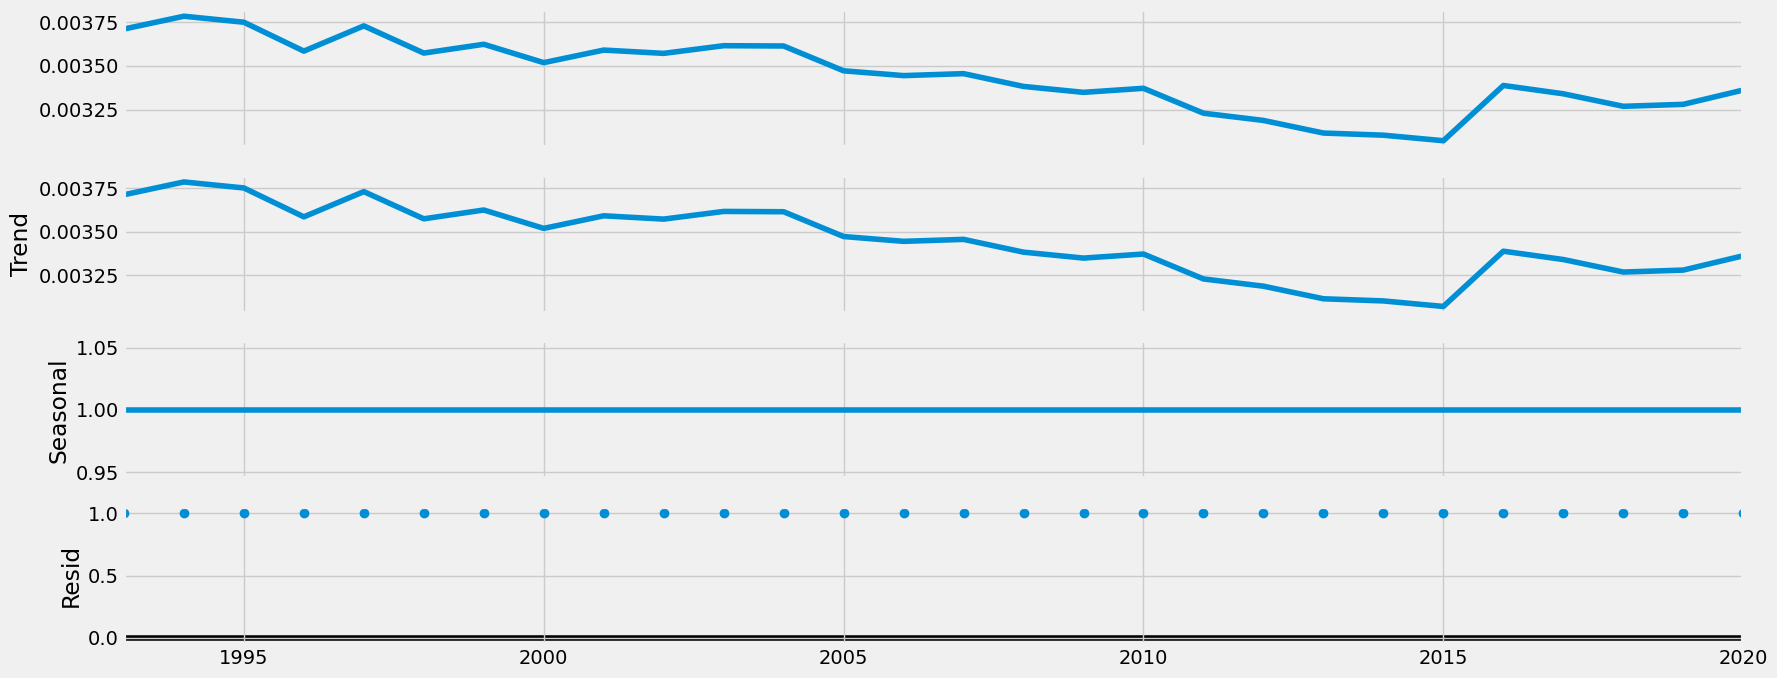

In [49]:
# Plot the separate components

decomposition_per_capita.plot()
plt.show()

The first and the second chart represent the data itself and the trend respectively. The level (data itself) and trend appear similar. This is because the data was not smoothed ( since it is a yearly data we do not expect a lot of fluctuation therefore no need to smooth the data). The seasonal chart does not show any seasonal fluctuations may be this is beacuse this is an annnual data. The fourth chart refers to the residual. The residual chart suggests that there is not much unexplained noise.

##### Testing for stationarity: per capita CO2

In [50]:
# Perform Dicky_Fuller stationarity test


def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(per_capita_emission_trend['Per capita emission'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.612482
p-value                         0.476673
Number of Lags Used             0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


    The result of Dickey-Fuller test ( i.e., the test statistics is larger than the critical value) suggest that data is non-stationary.

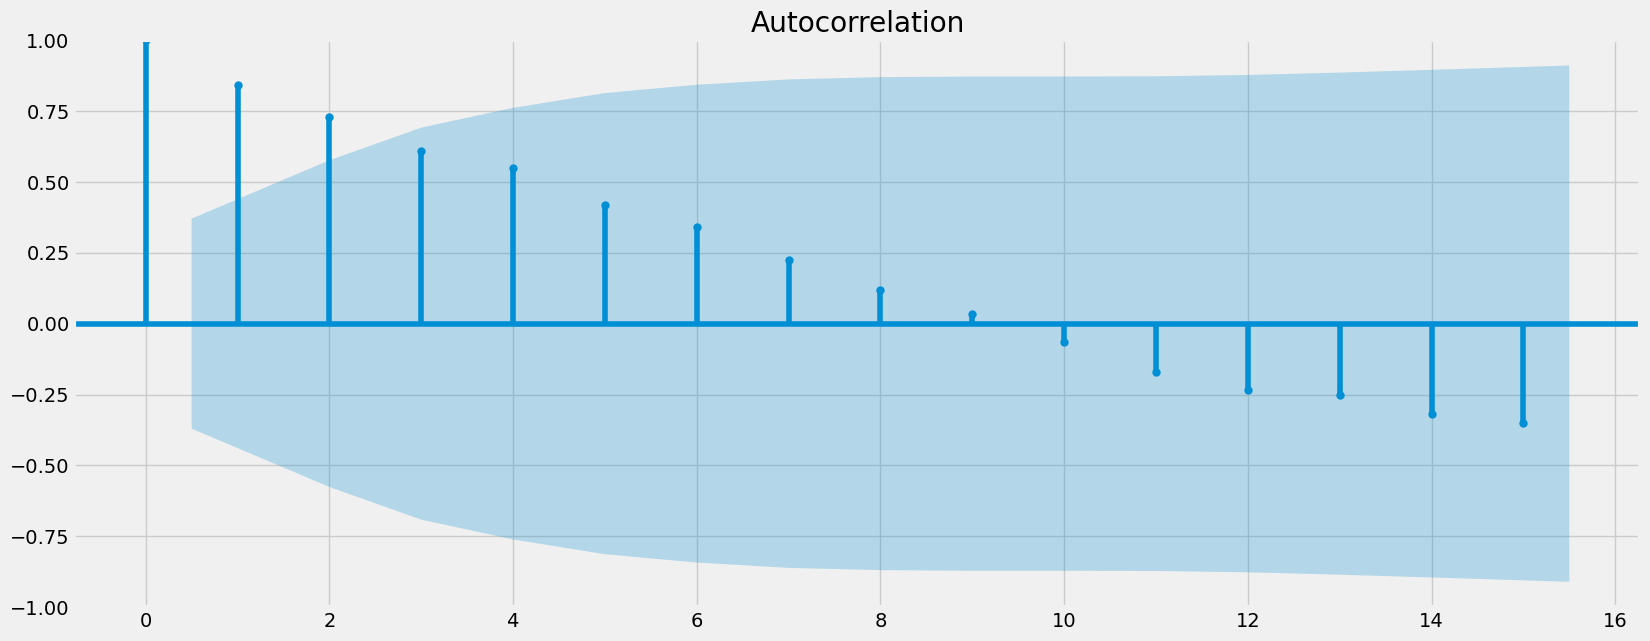

In [51]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(per_capita_emission_trend)
plt.show()

    The autocorrelation plot shows that there are a couple of lags beyond the confidence interval.

##### Stationarizing the per capita CO2 emission data

In [52]:
data_diff_per_capita = per_capita_emission_trend - per_capita_emission_trend.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [53]:
data_diff_per_capita.dropna(inplace = True) # Remove the missing values that came about as a result of the differencing. Otherwise,we won't be able to run the Dickey-Fuller test.

In [54]:
data_diff_per_capita.head()

,Per capita emission
Year,
1994,0.000073
1995,-0.000034
1996,-0.000166
1997,0.000145
1998,-0.000156


In [55]:
data_diff_per_capita.columns # Check columns of the new dataset

Index(['Per capita emission'], dtype='object')

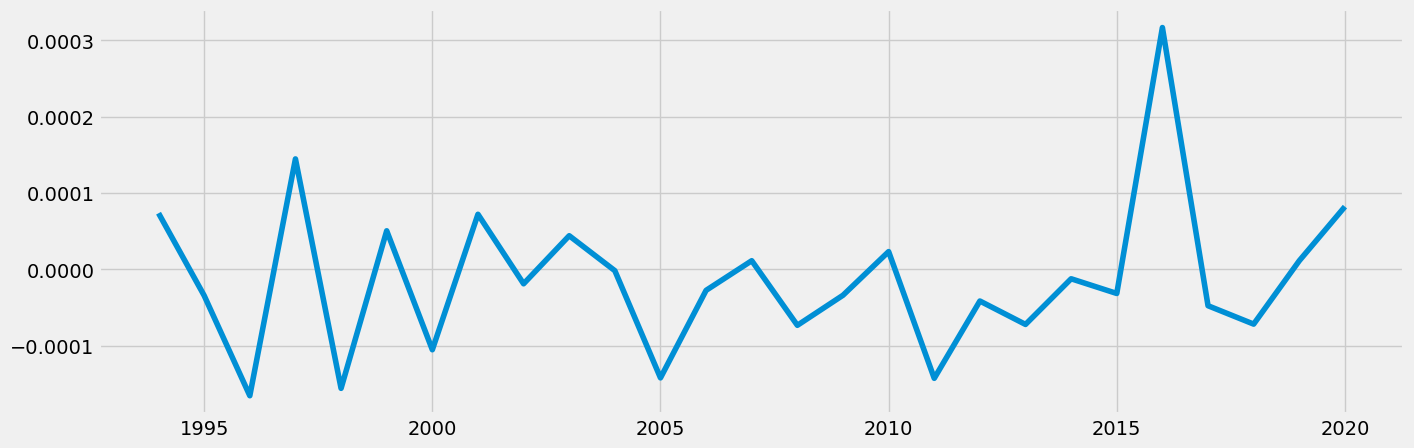

In [56]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_per_capita)

In [57]:
dickey_fuller(data_diff_per_capita) # Check stationarity in the new dataset

Dickey-Fuller Stationarity test:
Test Statistic                -6.828325e+00
p-value                        1.922226e-09
Number of Lags Used            0.000000e+00
Number of Observations Used    2.600000e+01
Critical Value (1%)           -3.711212e+00
Critical Value (5%)           -2.981247e+00
Critical Value (10%)          -2.630095e+00
dtype: float64


    The result of Dickey-Fuller test suggests that our data is now stationary( the test statistics is lessthan the critical value)

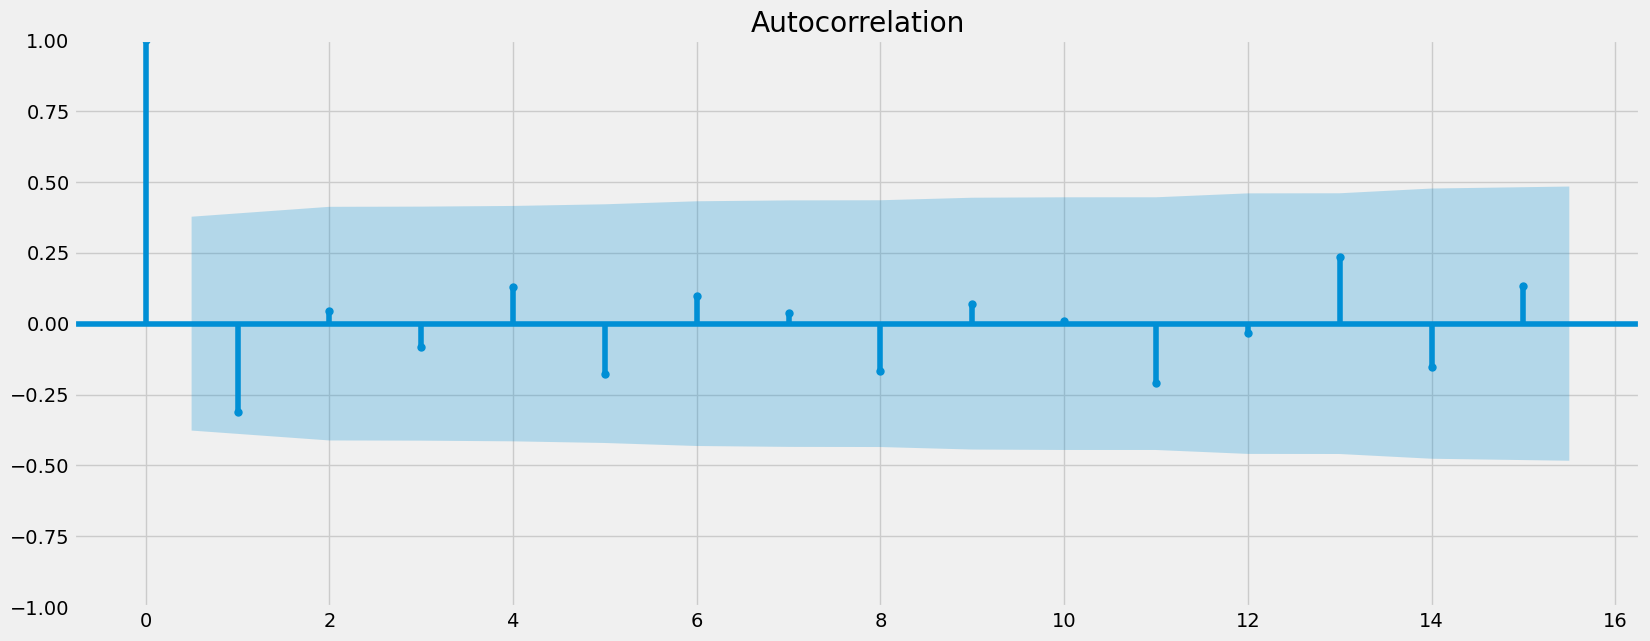

In [58]:
plot_acf(data_diff_per_capita)
plt.show()

## 1.3 Supervised machine learning: Linear regression 

The relationship between total/per capita CO2 emission, and the change in average temprature is explored in this section. The best scientific approach would be to look at the CO2 emission and the  temprature change at the global level. However, for this excercise I will simply take into consideration the emission and temprature change at the geographic area level so that I have enough data for the machine learning excercise.

### Data preparation for regression analysis

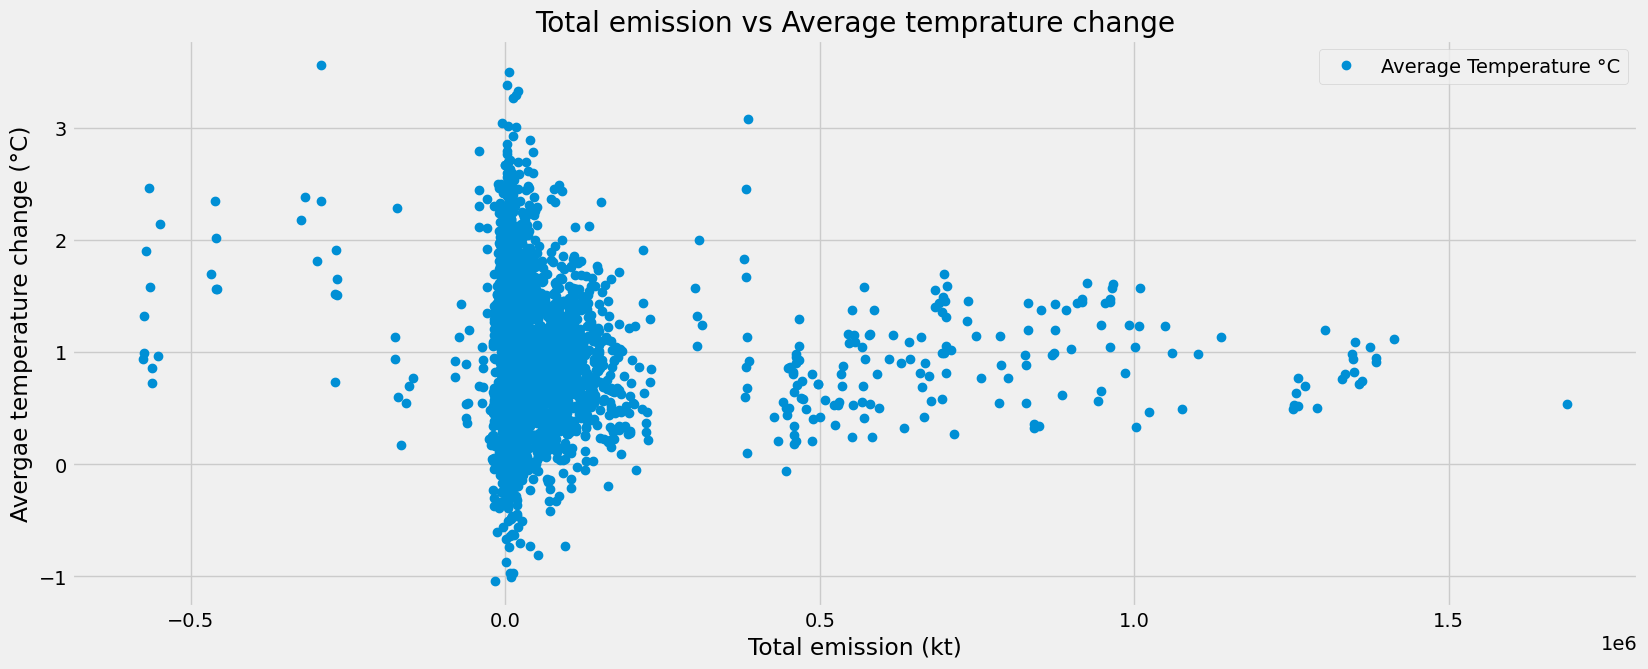

In [59]:
# Create a scatterplot using matplotlib to see how the 'Total emission' and 'Average Temprature Change' plot against each other .

agri_food_co2_emission.plot(x = 'Total emission', y='Average Temperature °C',style='o') # The style option creates a scatterplot; without it, we only have lines.

plt.title('Total emission vs Average temprature change')  
plt.xlabel('Total emission (kt)')  
plt.ylabel('Avergae temperature change (°C)')  

plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects. 

X = agri_food_co2_emission['Total emission'].values.reshape(-1,1)
y = agri_food_co2_emission['Average Temperature °C'].values.reshape(-1,1)

In [61]:
X

array([[ 1322.43052913],
       [ 1441.12852913],
       [ 1533.64692913],
       ...,
       [95787.94150478],
       [97199.18639901],
       [94660.22025296]])

In [62]:
y

array([[0.10191667],
       [0.37225   ],
       [0.28558333],
       ...,
       [0.51633333],
       [0.98566667],
       [0.189     ]])

In [63]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis 

In [64]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

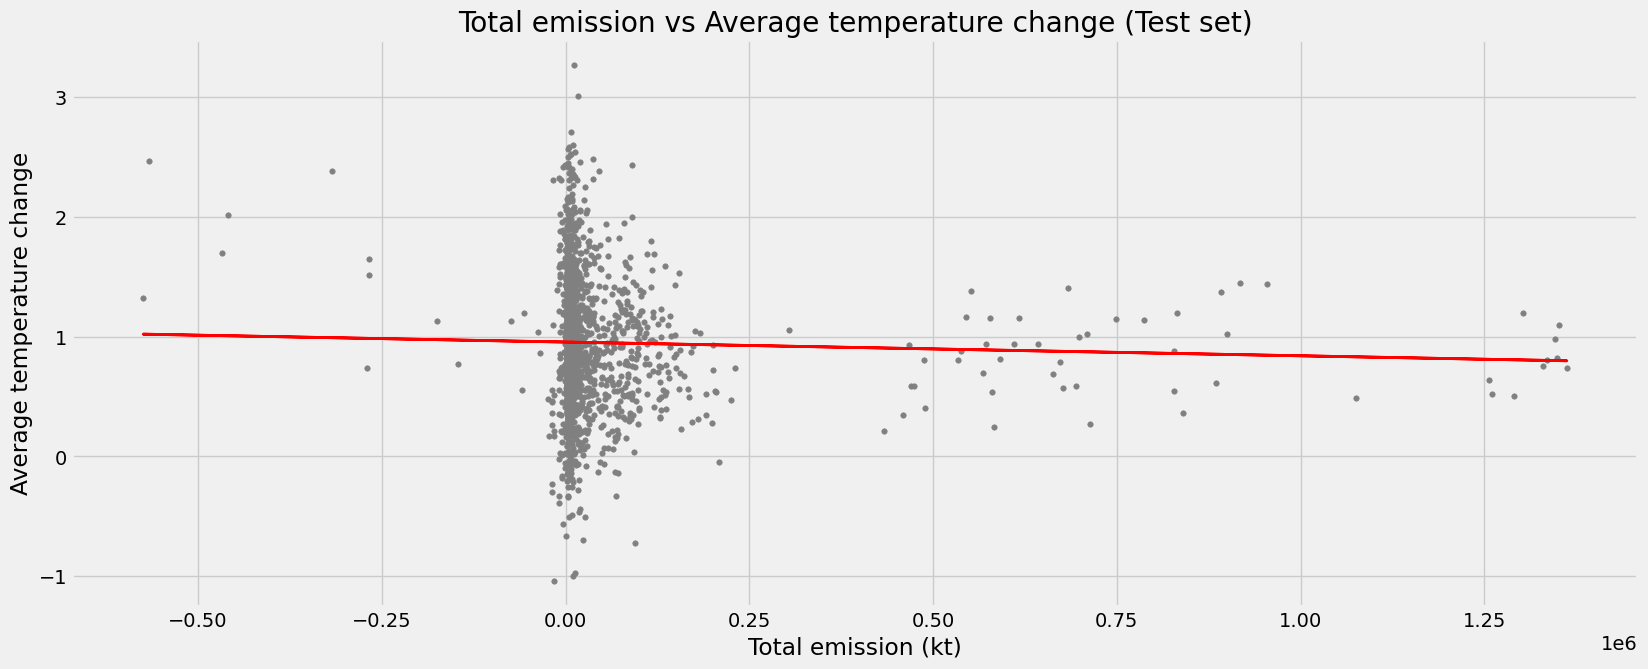

In [67]:

# Create a plot that shows the regression line from the model on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =2)

plt.title('Total emission vs Average temperature change (Test set)')
plt.xlabel('Total emission (kt)')
plt.ylabel('Average temperature change')

plt.show()





In [68]:
# Create objects that contain the model summary statistics (MSE and R2).

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where we can evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.14755382e-07]]
Mean squared error:  0.311184714263248
R2 score:  0.0012252402649517435


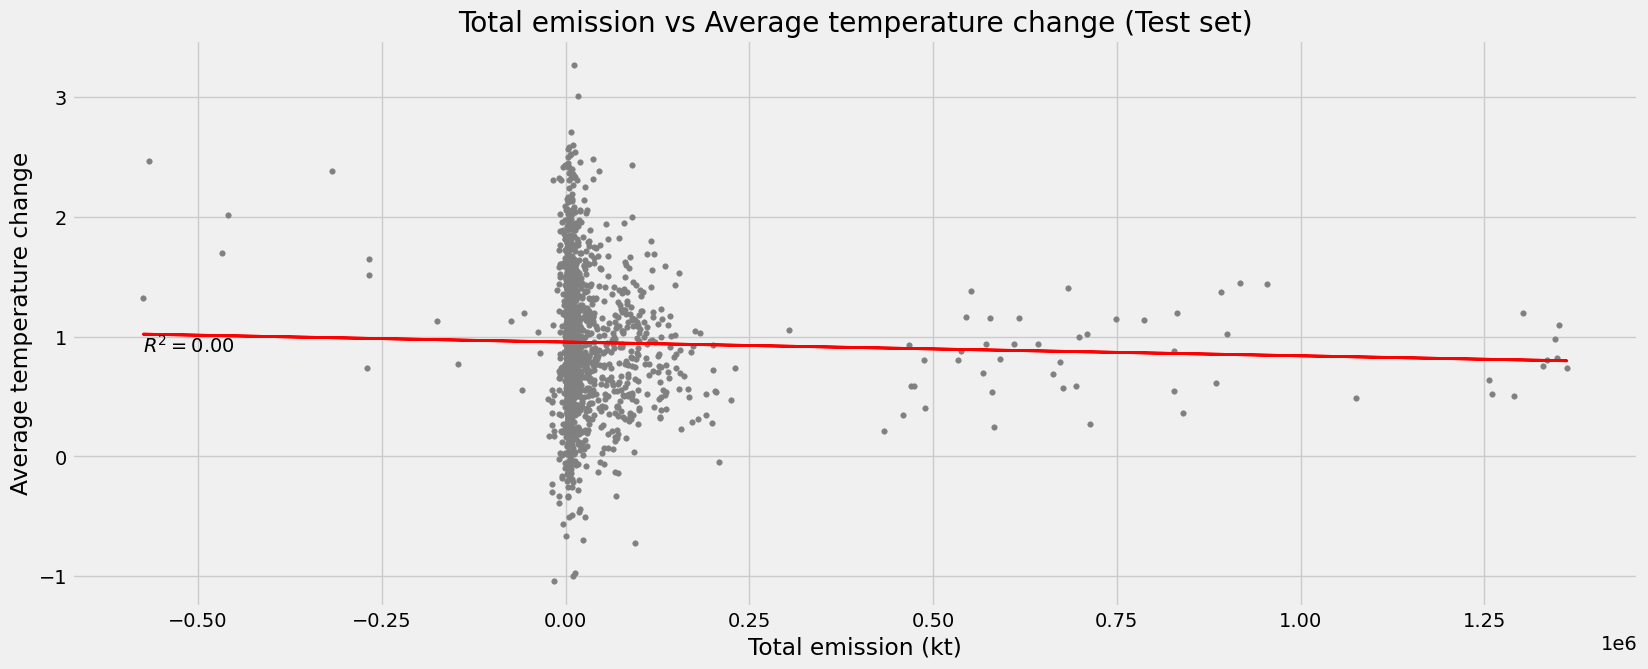

In [70]:
# Create the plot showing the R2 value in the plot

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =2)

plt.title('Total emission vs Average temperature change (Test set)')
plt.xlabel('Total emission (kt)')
plt.ylabel('Average temperature change')
plt.text(X_test.min(), y_predicted.max(), f'$R^2 = {r2:.2f}$', fontsize=14, verticalalignment='top', horizontalalignment='left')# Show R2 value in the plot

plt.show()


In [71]:
y_predicted

array([[0.95345355],
       [0.95409116],
       [0.9543447 ],
       ...,
       [0.94621082],
       [0.9538495 ],
       [0.95371588]])

In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.837167,0.953454
1,0.377714,0.954091
2,0.019250,0.954345
3,0.703833,0.952655
4,0.482667,0.957393
5,1.181167,0.953964
6,0.536000,0.953102
7,1.239667,0.951359
8,0.419833,0.954338
9,0.485250,0.954345
